# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# <br> **Section 1: Setup, Constants, Enumerations, and Captions**

## *Setup*

In [1]:
# *******************************************************************************************
 #
 #  File Name:  Pymaceuticals.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, Pymaceuticals.ipynb, reads two csv files,
 #      Mouse_metadata.csv and Study_results.csv, in the Resources folder, which 
 #      contain data about this pharmaceutical companny's most recent animal study. 
 #      In this study, 249 mice who were identified with SCC tumors received treatment 
 #      with a range of drug regimens. Over the course of 45 days, tumor development 
 #      was observed and measured. The purpose of this study was to compare the 
 #      performance of Pymaceuticals’ drug of interest, Capomulin, against the other 
 #      treatment regimens.  This Python script generates all of the tables and figures 
 #      needed for the technical report of this clinical study.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/10/2023      Initial Development                     Nicholas George
 #
 #******************************************************************************************/

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

from IPython.display import display
from pathlib import Path
from enum import Enum

## *Constants*

In [2]:
# This Boolean flag indicates whether the script is in debug mode or not.
CONSTANT_DEBUG_FLAG \
    = False


# These constants contain the names of the input file paths.
CONSTANT_MOUSE_DATA_INPUT_FILE_PATH \
    = './Resources/Mouse_metadata.csv'

CONSTANT_STUDY_DATA_INPUT_FILE_PATH \
    = './Resources/Study_results.csv'


# These constants represent data formats for display.
CONSTANT_GENERAL_FORMAT \
    = '{:}'

CONSTANT_INTEGER_FORMAT \
    = '{:,}'

CONSTANT_FLOAT_FORMAT \
    = '{:,.2f}'


# These constants represent alignment options.
CONSTANT_ALIGN_RIGHT = 'right'

CONSTANT_ALIGN_LEFT = 'left'

CONSTANT_ALIGN_CENTER = 'center'

## *Enumerations*

In [3]:
# This enumeration contains keys for the mouse metadata input file.
class MouseMetadataKeysEnumeration(Enum):

    MOUSE_ID = 0

    DRUG_REGIMEN = 1
    
    SEX = 2
    
    AGE_MONTHS = 3
    
    WEIGHT = 4
    
    
# This enumeration contains the keys for the complete medical study
# DataFrame.
class StudyCompleteKeysEnumeration(Enum):

    MOUSE_ID = 0

    DRUG_REGIMEN = 1
    
    SEX = 2
    
    AGE_MONTHS = 3
    
    WEIGHT = 4
    
    TIMEPOINT = 5
    
    TUMOR_VOLUME = 6
    
    METASTATIC_SITES = 7
    

# This enumeration contains the keys for the summary statistics
# DataFrame.
class SummaryStatisticsKeysEnumeration(Enum):

    MEAN = 0

    MEDIAN = 1
    
    VARIANCE = 2
    
    STANDARD_DEVIATION = 3
    
    STANDARD_ERROR_OF_MEAN = 4

## *Captions*

In [4]:
# This enumeration holds the indices for the captions Tuple below.
class captionsEnumeration(Enum):
    
    CAPTION_3_1 = 0
    
    CAPTION_3_2 = 1
    
    CAPTION_4 = 2
    
    CAPTION_5_1_TITLE = 3
    
    CAPTION_5_1_XLABEL = 4
    
    CAPTION_5_1_YLABEL = 5
    
    CAPTION_5_2_TITLE = 6
    
    CAPTION_5_2_XLABEL = 7
    
    CAPTION_5_2_YLABEL = 8
    
    CAPTION_5_3_TITLE = 9
    
    CAPTION_5_4_TITLE = 10
    
    CAPTION_6_6_TITLE = 11
    
    CAPTION_6_6_XLABEL = 12
    
    CAPTION_6_6_YLABEL = 13
    
    CAPTION_7_2_TITLE = 14
    
    CAPTION_7_2_XLABEL = 15
    
    CAPTION_7_2_YLABEL = 16
    
    CAPTION_8_1_TITLE = 17
    
    CAPTION_8_1_XLABEL = 18
    
    CAPTION_8_1_YLABEL = 19
    
    
# The tuple holds this Python script's captions.
captionsTuple \
    = ('Table 3.1: Complete Medical Study Data (5 rows)',
       'Table 3.2: Clean Complete Medical Study Data (5 rows)',
       'Table 4: Summary Statistics for Tumor Volume in Cubic Millimeters',
       'Graph 5.1: Total Mouse ID/Timepoints by Drug Regimen Using Pandas',
       'Drug Regimen',
       'Number of Mouse ID/Timepoints',
       'Graph 5.2: Total Mouse ID/Timepoints by Drug Regimen Using Matplotlib',
       'Drug Regimen',
       'Number of Mouse ID/Timepoints',
       'Graph 5.3: Distribution of Female Versus Male Mice Using Pandas',
       'Graph 5.4: Distribution of Female Versus Male Mice Using Matplotlib',
       'Graph 6.6: Tumor Volume by Drug Regimen',
       'Drug Regimen',
       'Tumor Volume (cubic mm)',
       'Graph 7.2: Mouse Weight vs. Tumor Volume (Mean) (Capomulin)',
       'Tumor Volume (Mean) (cubic mm)',
       'Mouse Weight (Mean) (grams)',
       'Graph 8.1: Mouse Weight vs. Tumor Volume (Mean) with Linear Regression (Capomulin)',
       'Tumor Volume (Mean) (cubic mm)',
       'Mouse Weight (Mean) (grams)')

# <br> **Section 2: Function and Subroutine Definitions**

## *Functions*

In [5]:
#*******************************************************************************************
 #
 #  Function Name:  StudyCompleteFormattedDisplayFunction
 #
 #  Function Description:
 #      This function receives a medical study complete DataFrame as input, copies it 
 #      to a new DataFrame for processing, formats the new DataFrame, and returns it 
 #      to the caller.
 #
 #
 #  Function Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  DataFrame
 #          summaryDataFrameParameter
 #                          The parameter is the input DataFrame.
 #  String
 #          captionStringParameter
 #                          The parameter is the text for the caption.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/10/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/
    
def StudyCompleteFormattedDisplayFunction \
        (summaryDataFrameParameter,
         captionStringParameter):
  
    # This line of code creates a copy of the input DataFrame for formatting
    # and display.
    summaryDataFrame \
        = summaryDataFrameParameter \
            .copy()
    
    
    # This line of code removes the index column name from the DataFrame for 
    # display purposes.
    summaryDataFrame \
        .index \
        .name \
            = None

    
    # This line of code formats the DataFrame and returns it to the caller.
    return \
        summaryDataFrame \
            .style \
            .set_caption \
                (captionStringParameter) \
            .set_table_styles \
                ([{'selector': 'caption', 
                   'props': \
                        [('color', 'black'), 
                         ('font-size', '16px'),
                         ('font-style', 'bold'),
                         ('text-align', CONSTANT_ALIGN_CENTER)]}]) \
            .set_properties \
                (**{'text-align': CONSTANT_ALIGN_CENTER}) \
            .format \
                ({summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.MOUSE_ID.value]: \
                            CONSTANT_GENERAL_FORMAT, 
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]: \
                            CONSTANT_GENERAL_FORMAT, 
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.SEX.value]: \
                            CONSTANT_GENERAL_FORMAT,
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.AGE_MONTHS.value]: \
                            CONSTANT_INTEGER_FORMAT,
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.WEIGHT.value]: \
                            CONSTANT_INTEGER_FORMAT,
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.TIMEPOINT.value]: \
                            CONSTANT_INTEGER_FORMAT,
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]: \
                            CONSTANT_FLOAT_FORMAT, \
                  summaryDataFrame.keys() \
                      [StudyCompleteKeysEnumeration.METASTATIC_SITES.value]: \
                            CONSTANT_INTEGER_FORMAT}) \
            .hide()


#*******************************************************************************************
 #
 #  Function Name:  SummaryStaticticsFormattedDisplayFunction
 #
 #  Function Description:
 #      This function receives a summary statistics DataFrame as input, copies it 
 #      to a new DataFrame for processing, formats the new DataFrame, and returns 
 #      it to the caller.
 #
 #
 #  Function Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  DataFrame
 #          summaryDataFrameParameter
 #                          The parameter is the input DataFrame.
 #  String
 #          captionStringParameter
 #                          The parameter is the text for the caption.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/10/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/
    
def SummaryStaticticsFormattedDisplayFunction \
        (summaryDataFrameParameter,
         captionStringParameter):

    # This line of code creates a copy of the input DataFrame for formatting
    # and display.
    summaryDataFrame \
        = summaryDataFrameParameter \
            .copy()
    
    
    # This line of code removes the index column name from the DataFrame for 
    # display purposes.
    summaryDataFrame \
        .index \
        .name \
            = None

    
    # This line of code formats the school summary DataFrame and returns it for 
    # display.
    return \
        summaryDataFrame \
            .style \
            .set_caption \
                (captionStringParameter) \
            .set_table_styles \
                    ([{'selector': 'caption', 
                       'props': [('color', 'black'), 
                                 ('font-size', '16px'),
                                 ('font-style', 'bold'),
                                 ('text-align', CONSTANT_ALIGN_CENTER)]}]) \
                .set_properties \
                    (**{'text-align': CONSTANT_ALIGN_CENTER,
                        'border': '1.3px solid red',
                        'color': 'blue'}) \
                .format \
                    (precision = 2, 
                     thousands = ',', 
                     decimal = '.') \
                .highlight_max \
                    (color \
                        ='orange') \
                .highlight_min \
                    (color \
                        ='lime')


#*******************************************************************************************
 #
 #  Function Name:  CalculateDisplaySummaryStatisticsFunction
 #
 #  Function Description:
 #      This subroutine receives the name of a drug regimen and a Series with its 
 #      tumor volume data, calculates the summary statistics, and returns these 
 #      metrics to the caller as a DataFrame.
 #
 #
 #  Function Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  String
 #          regimenNameStringParameter
 #                          This parameter is the name of the drug regimen.
 #  Integer
 #          tumorVolumeIndexIntegerParameter
 #                          The parameter is the tumor volume List index value.
 #  Series
 #          tumorVolumeSeriesParameter
 #                          This parameter is the tumor volume data for the drug regimen.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/12/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/

def CalculateDisplaySummaryStatisticsFunction \
        (regimenNameStringParameter, 
         tumorVolumeIndexIntegerParameter, 
         tumorVolumeSeriesParameter):
    
    captionNameStringVariable \
        = f'Table 6.{tumorVolumeIndexIntegerParameter+1}: ' \
            + f'{regimenNameStringParameter} Tumor Volume Statistics'
    
    
    quartilesSeries \
        = tumorVolumeSeriesParameter \
            .quantile \
                ([0.25,0.5,0.75])
    
    
    lowerQuartileFloatVariable \
        = quartilesSeries[0.25]
    
    upperQuartileFloatVariable \
        = quartilesSeries[0.75]
    
    
    interquartileRangeFloatVariable \
        = upperQuartileFloatVariable - lowerQuartileFloatVariable

    
    lowerBoundFloatVariable \
        = lowerQuartileFloatVariable - (1.5*interquartileRangeFloatVariable)
    
    upperBoundFloatVariable \
        = upperQuartileFloatVariable + (1.5*interquartileRangeFloatVariable)
    
    
    outliersSeries \
        = tumorVolumeSeriesParameter \
                .loc[(tumorVolumeSeriesParameter < lowerBoundFloatVariable) \
                      | (tumorVolumeSeriesParameter > upperBoundFloatVariable)]
    
    numberOfOutliersIntegerVariable \
        = len(outliersSeries)

    
    # These lines of code create a list of all the summary statistics and store
    # the data in a DataFrame.
    summaryStatisticsList \
        = [{'Lower Quartile': \
                lowerQuartileFloatVariable,
            'Upper Quartile': \
                upperQuartileFloatVariable,
            'Interquartile Range': \
                interquartileRangeFloatVariable,
            'Mean': \
                quartilesSeries[0.5],
            'Lower Boundary': \
                lowerBoundFloatVariable,
            'Upper Boundary': \
                upperBoundFloatVariable,
            'Number of Outliers': \
                numberOfOutliersIntegerVariable}]
    
    summaryStatisticsDataFrame \
        = pd \
            .DataFrame \
                (summaryStatisticsList)
    
    
    # This line of code returns the summary statistics as a DataFrame.
    return \
            summaryStatisticsDataFrame \
                .style \
                .set_caption \
                    (captionNameStringVariable) \
                .set_table_styles \
                    ([{'selector': 'caption', 
                       'props': [('color', 'black'), 
                                 ('font-size', '16px'),
                                 ('font-style', 'bold'),
                                 ('text-align', 'center')]}]) \
                .set_properties \
                    (**{'text-align': 'center',
                        'border': '1.3px solid red',
                        'color': 'blue'}) \
                .format \
                    (precision=2, 
                     thousands=',', 
                     decimal='.') \
                .hide()
        


#*******************************************************************************************
 #
 #  Function Name:  DisplayNumberOfMiceFunction
 #
 #  Function Description:
 #      This function receives a medical study complete DataFrame as input, calculates
 #      the number of mice in the DataFrame, and returns that number.
 #
 #
 #  Function Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  DataFrame
 #          summaryDataFrameParameter
 #                          The parameter is the input DataFrame.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/11/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/

def DisplayNumberOfMiceFunction \
        (studyDataFrameParameter):
    
    # This line of code calculates the number of mice.
    numberOfMiceIntegerVariable \
        = studyDataFrameParameter \
            [studyDataFrameParameter.keys() \
                [StudyCompleteKeysEnumeration.MOUSE_ID.value]] \
            .nunique()


    # This line of code returns that number to the caller.
    return \
        numberOfMiceIntegerVariable


#*******************************************************************************************
 #
 #  Function Name:  DebugReturnObjectFunction
 #
 #  Subroutine Description:
 #      This function returns the input object if the global debug flag, 
 #      CONSTANT_DEBUG_FLAG, is set to true.
 #
 #
 #  Subroutine Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  Unknown
 #          objectUnknownTypeParameter
 #                          The parameter is the input object.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/11/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/

def DebugReturnObjectFunction \
        (objectUnknownTypeParameter):
    
    # This line of code displays the value of the variable if the script
    # sets the debug flag to true.
    if CONSTANT_DEBUG_FLAG == True:
        return objectUnknownTypeParameter
    else:
        return None
    

## *Subroutines*

In [6]:
#*******************************************************************************************
 #
 #  Subroutine Name:  DebugPrintObjectSubRoutine
 #
 #  Subroutine Description:
 #      This subroutine prints the input object if the global debug flag, 
 #      CONSTANT_DEBUG_FLAG, is set to true.
 #
 #
 #  Subroutine Parameters:
 #
 #  Type    Name            Description
 #  -----   -------------   ----------------------------------------------
 #  Unknown
 #          objectUnknownTypeParameter
 #                          The parameter is the input object.
 #
 #
 #  Date                Description                                 Programmer
 #  ---------------     ------------------------------------        ------------------
 #  8/10/2023           Initial Development                         Nicholas George
 #
 #******************************************************************************************/

def DebugPrintObjectSubRoutine \
        (objectUnknownTypeParameter):
    
    # This line of code displays the value of the variable if the script
    # sets the debug flag to true.
    if CONSTANT_DEBUG_FLAG == True:
        print(objectUnknownTypeParameter)

# <br> **Section 3: Prepare the Data**

## *Merge Input Data into Single Dataframe and Display*

In [7]:
# This line of code stores the mouse metadata input file path in a variable.
mouseMetaDataToLoadPath \
    = Path \
        (CONSTANT_MOUSE_DATA_INPUT_FILE_PATH)


# This subroutine prints the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (mouseMetaDataToLoadPath)

In [8]:
# This line of code stores the medical study results input file path in a variable.
studyResultsDataToLoadPath \
    = Path \
        (CONSTANT_STUDY_DATA_INPUT_FILE_PATH)


# This subroutine prints the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (studyResultsDataToLoadPath)

In [9]:
# This lines of code reads the dataset from the mouse metadata input file 
# and stores it in a DataFrame.
mouseMetaDataFrame \
    = pd \
        .read_csv \
            (mouseMetaDataToLoadPath)


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (mouseMetaDataFrame)

In [10]:
# This lines of code reads the dataset from the medical study results input file 
# and stores it in a DataFrame.
studyResultsDataFrame \
    = pd \
        .read_csv \
            (studyResultsDataToLoadPath)


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (studyResultsDataFrame)

In [11]:
# This line of code merges the two input DataFrames into a single DataFrame 
# and displays that DataFrame.
studyCompleteDataFrame \
    = pd \
        .merge \
            (mouseMetaDataFrame,
             studyResultsDataFrame,
             how \
                 = CONSTANT_ALIGN_RIGHT,
             on \
                 = [mouseMetaDataFrame.keys() \
                        [MouseMetadataKeysEnumeration.MOUSE_ID.value],
                    mouseMetaDataFrame.keys() \
                        [MouseMetadataKeysEnumeration.MOUSE_ID.value]])


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (studyCompleteDataFrame)

In [12]:
# This function formats and displays the first five rows of the study 
# complete DataFrame.
StudyCompleteFormattedDisplayFunction \
    (studyCompleteDataFrame.head(),
         captionsTuple \
             [captionsEnumeration.CAPTION_3_1.value])

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
b128,Capomulin,Female,9,22,0,45.00,0
f932,Ketapril,Male,15,29,0,45.00,0
g107,Ketapril,Female,2,29,0,45.00,0
a457,Ketapril,Female,11,30,0,45.00,0
c819,Ketapril,Male,21,25,0,45.00,0


## *Clean DataFrame by Removing Mouse IDs with Dupicate Time Points*

In [13]:
# This line of code prints the number of mice in the DataFrame.
print \
     (f'The number of mice in the medical study DataFrame is ' \
            f'{DisplayNumberOfMiceFunction(studyCompleteDataFrame)}.')

The number of mice in the medical study DataFrame is 249.


In [14]:
# These lines of code create a DataFrame containing mice IDs with duplicate 
# time points and displays that DataFrame.
duplicateMouseIDDataFrame \
    = studyCompleteDataFrame \
        [studyCompleteDataFrame.duplicated \
             (subset \
                  = [studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.MOUSE_ID.value],
                     studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.TIMEPOINT.value]])]

duplicateMouseIDDataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# This line of code finds the first Mouse ID from the mouse ID with duplicate time points 
# DataFrame, removes those rows from the medical study DataFrame, and assigns the results 
# to a new clean medical study DataFrame.
cleanStudyCompleteDataFrame \
    = studyCompleteDataFrame \
        .loc \
            [(studyCompleteDataFrame \
                  [studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.MOUSE_ID.value]] \
              != duplicateMouseIDDataFrame \
                  .iloc \
                      [StudyCompleteKeysEnumeration.MOUSE_ID.value] \
                      [StudyCompleteKeysEnumeration.MOUSE_ID.value]), \
             :].copy()


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (cleanStudyCompleteDataFrame)

In [16]:
# This function formats and displays the study complete DataFrame.
StudyCompleteFormattedDisplayFunction \
    (cleanStudyCompleteDataFrame.head(),
         captionsTuple \
             [captionsEnumeration.CAPTION_3_2.value])

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
b128,Capomulin,Female,9,22,0,45.00,0
f932,Ketapril,Male,15,29,0,45.00,0
g107,Ketapril,Female,2,29,0,45.00,0
a457,Ketapril,Female,11,30,0,45.00,0
c819,Ketapril,Male,21,25,0,45.00,0


In [17]:
# During debug mode, this function prints out the number of mouse IDs 
# with duplicate time points in the clean medical study DataFrame. If
# the process worked, the displayed result should be zero.
DebugReturnObjectFunction \
    (len \
        (cleanStudyCompleteDataFrame \
             [cleanStudyCompleteDataFrame.duplicated \
                  (subset \
                       = [studyCompleteDataFrame.keys() \
                                [StudyCompleteKeysEnumeration.MOUSE_ID.value],
                          studyCompleteDataFrame.keys() \
                                [StudyCompleteKeysEnumeration.TIMEPOINT.value]])]))

In [18]:
# This line of code prints the number of mice in the DataFrame.
print \
     (f'The number of mice in the clean medical study DataFrame is ' \
            f'{DisplayNumberOfMiceFunction(cleanStudyCompleteDataFrame)}.')

The number of mice in the clean medical study DataFrame is 248.


# <br> **Section 4: Generate Summary Statistics**

In [19]:
# This line of code groups the clean medical study DataFrame by the drug regimen.
cleanStudyCompleteByRegimenDataFrame \
    = cleanStudyCompleteDataFrame \
        .groupby \
            (studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value])


# These lines of code calculate the values for the columns of the summary
# statistics DataFrame and stores them in the appropriate Series.
meanSummaryStatisticsSeries \
    = cleanStudyCompleteByRegimenDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
            .mean()

medianSummaryStatisticsSeries \
    = cleanStudyCompleteByRegimenDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
            .median()

varianceSummaryStatisticsSeries \
    = cleanStudyCompleteByRegimenDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
            .var()

standardDeviationSummaryStatisticsSeries \
    = cleanStudyCompleteByRegimenDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
            .std()

standardErrorOfMeanSummaryStatisticsSeries \
    = cleanStudyCompleteByRegimenDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
            .sem()


# These subroutines print the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (meanSummaryStatisticsSeries)
print()

DebugPrintObjectSubRoutine \
    (medianSummaryStatisticsSeries)
print()

DebugPrintObjectSubRoutine \
    (varianceSummaryStatisticsSeries)
print()

DebugPrintObjectSubRoutine \
    (standardDeviationSummaryStatisticsSeries)
print()

DebugPrintObjectSubRoutine \
    (standardErrorOfMeanSummaryStatisticsSeries)
print()

In [20]:
# This line of code creates a statistics summary DataFrame from the Series above.
summaryStatisticsDataFrame \
    = pd \
        .DataFrame({
            'Mean': \
                meanSummaryStatisticsSeries,
            'Median': \
                medianSummaryStatisticsSeries,
            'Variance': \
                varianceSummaryStatisticsSeries,
            'Standard Deviation': \
                standardDeviationSummaryStatisticsSeries,
            'Standard Error of Mean': \
                standardErrorOfMeanSummaryStatisticsSeries})


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (summaryStatisticsDataFrame)

In [21]:
# This line of code displays the formatted summary statistics.
SummaryStaticticsFormattedDisplayFunction \
    (summaryStatisticsDataFrame,
         captionsTuple \
             [captionsEnumeration.CAPTION_4.value])

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


# <br> *Section 5: Create Bar Charts and Pie Charts*

## *Bar Charts*

In [22]:
# These lines of code assign the parameter values for both bar charts.
colorsBarList \
    = ['red',
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue']

edgeColorStringVariable \
    = 'blue'

lineWidthFloatVariable \
    = 1.0

alphaFloatVariable \
    = 1.0

widthFloatVariable \
    = 0.5

axisTickLabelRotationFloatVariable \
    = 80.0

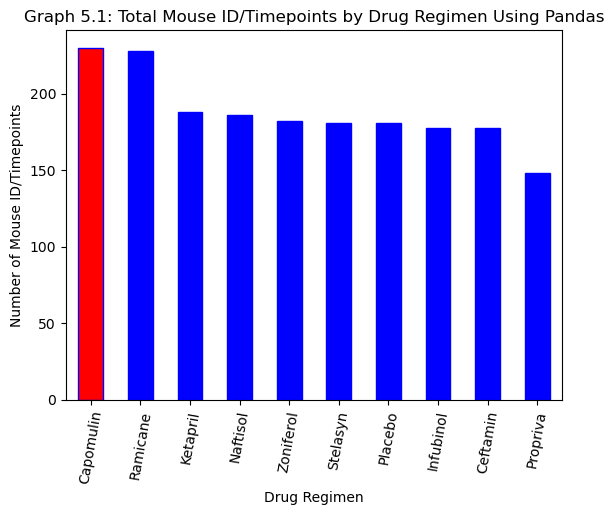

In [23]:
# These lines of code display a bar chart of the total mouse ID/timepoints 
# for each drug regimen using Pandas.
countByDrugRegimenDataFrame \
    = cleanStudyCompleteDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] \
            .value_counts()


countByDrugRegimenDataFrame \
    .plot \
    .bar \
        (stacked \
             = False,
         align \
             = CONSTANT_ALIGN_CENTER,
         color \
             = colorsBarList,
         edgecolor \
             = edgeColorStringVariable,
         linewidth \
             = lineWidthFloatVariable,
         alpha \
             = alphaFloatVariable,
         width \
             = widthFloatVariable, 
         title \
             = captionsTuple \
                    [captionsEnumeration.CAPTION_5_1_TITLE.value],
         xlabel \
             = captionsTuple \
                    [captionsEnumeration.CAPTION_5_1_XLABEL.value], 
         ylabel \
             = captionsTuple \
                    [captionsEnumeration.CAPTION_5_1_YLABEL.value], 
         rot \
             = axisTickLabelRotationFloatVariable,
         legend \
             = False)

plt.show()

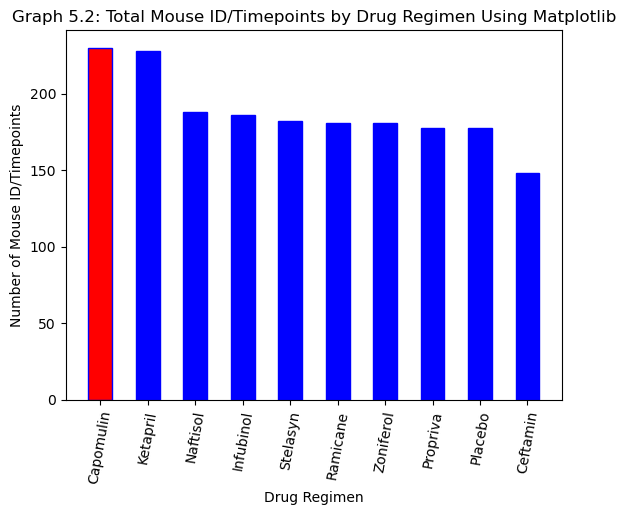

In [24]:
# These lines of code display a bar chart of the total mouse ID/timepoints 
# for each drug regimen using Matplotlib.
drugRegimenNamesArray \
    = cleanStudyCompleteDataFrame \
        [studyCompleteDataFrame.keys() \
            [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] \
        .unique()

drugRegimenCountsSeries \
    = cleanStudyCompleteDataFrame \
        [studyCompleteDataFrame.keys() \
            [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] \
        .value_counts()


plt \
    .bar \
        (drugRegimenNamesArray,
         drugRegimenCountsSeries,
         align \
             = CONSTANT_ALIGN_CENTER,
         color \
             = colorsBarList,
         edgecolor \
             = edgeColorStringVariable,
         linewidth \
             = lineWidthFloatVariable,
         alpha \
             = alphaFloatVariable,
         width \
             = widthFloatVariable)

plt \
    .title \
        (captionsTuple \
            [captionsEnumeration.CAPTION_5_2_TITLE.value])

plt \
    .xlabel \
        (captionsTuple \
            [captionsEnumeration.CAPTION_5_2_XLABEL.value])

plt \
    .ylabel \
        (captionsTuple \
            [captionsEnumeration.CAPTION_5_2_YLABEL.value])

plt \
    .xticks \
        (rotation \
             = axisTickLabelRotationFloatVariable) 

plt \
    .show()

## *Pie Charts*

In [25]:
# These lines of code assign the parameter values for both pie charts.
colorsPieList \
    = ['steelblue',
       'pink']

explodeTuple \
    = (0.01,
       0.01)

startAngleFloatVariable \
    = 40.0

autoPercentStringVariable \
    = '%1.2f%%'

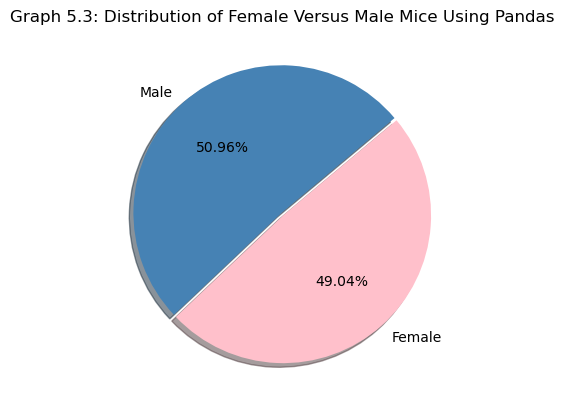

In [26]:
# These lines of code display a pie chart distribution of female versus male mice 
# in the study using Pandas.
mouseCountByGenderSeries \
    = cleanStudyCompleteDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.SEX.value]] \
            .value_counts()

mouseCountByGenderSeries \
    .rename \
        (None, 
         inplace \
             = True)


mouseCountByGenderSeries \
    .plot \
    .pie \
        (colors \
             = colorsPieList, 
         explode \
             = explodeTuple, 
         shadow \
             = True, 
         startangle \
             = startAngleFloatVariable, 
         autopct \
             = autoPercentStringVariable,
         title \
             = captionsTuple \
                    [captionsEnumeration.CAPTION_5_3_TITLE.value],
         legend \
             = False)

plt \
    .show()

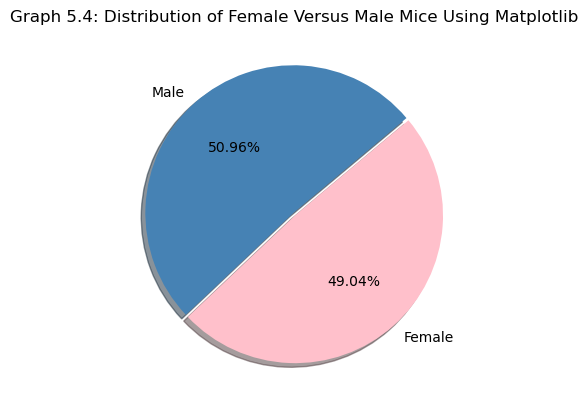

In [27]:
# These lines of code display a pie chart distribution of female versus male mice 
# in the study using Matplotlib.
plt \
    .pie \
        (mouseCountByGenderSeries,
         labels \
             = mouseCountByGenderSeries.index, 
         colors \
             = colorsPieList,        
         explode \
             = explodeTuple, 
         shadow \
             = True, 
         startangle \
             = startAngleFloatVariable,
         autopct \
             = autoPercentStringVariable)

plt \
    .title \
        (captionsTuple \
            [captionsEnumeration.CAPTION_5_4_TITLE.value])

plt \
    .show()

# <br> *Section 6: Calculate Quartiles, Find Outliers, and Create a Box Plot*

## *Quartiles and Outliers*

In [28]:
# This line of code extracts only rows for the four most promising treatment 
# regimens and placebos and assigns the data to a DataFrame.
promisingTreatmentRegimensDataFrame \
    = cleanStudyCompleteDataFrame \
        .loc \
            [(cleanStudyCompleteDataFrame[studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] == 'Capomulin')|
             (cleanStudyCompleteDataFrame[studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] == 'Ramicane')|
             (cleanStudyCompleteDataFrame[studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] == 'Infubinol')|
             (cleanStudyCompleteDataFrame[studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] == 'Ceftamin')|
             (cleanStudyCompleteDataFrame[studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] == 'Placebo'), 
             :]


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.  
DebugReturnObjectFunction \
    (promisingTreatmentRegimensDataFrame)

In [29]:
# This line of code groups the promising treatment regimen DataFrame by mouse id 
# and extracts the greatest timepoint for each mouse.
maximumTimepointPerMouseDataFrame \
    = promisingTreatmentRegimensDataFrame \
        .groupby \
            ([studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.MOUSE_ID.value]]) \
                    [studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.TIMEPOINT.value]] \
        .max() \
        .reset_index()

        
# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.  
DebugReturnObjectFunction \
    (maximumTimepointPerMouseDataFrame)

In [30]:
# This line of code merges the maximum timepoint per mouse DataFrame 
# with the original cleaned medical study complete DataFrame to obtain 
# the tumor volume at the last timepoint.
updatedStudyCompleteDataFrame \
    = pd \
        .merge \
            (maximumTimepointPerMouseDataFrame,
             studyCompleteDataFrame, 
             on \
                 = [studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.MOUSE_ID.value],
                    studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.TIMEPOINT.value]],
                    how \
                        = CONSTANT_ALIGN_LEFT)


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.  
DebugReturnObjectFunction \
    (updatedStudyCompleteDataFrame)

In [31]:
# These lines of code check in debug mode to see if the mouse IDs in the updated 
# medical study complete DataFrame are the same as those in the maximum timepoint 
# DataFrame.
if CONSTANT_DEBUG_FLAG == True:
    
    uniqueMouseIDsMergedStudyArray \
        = updatedStudyCompleteDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.MOUSE_ID.value]] \
            .unique()
    
    uniqueMouseIDsMaximumTimePointArray \
        = maximumTimepointPerMouseDataFrame \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.MOUSE_ID.value]] \
            .unique()
    
    print \
        (np \
            .array_equal \
                (uniqueMouseIDsMergedStudyArray, 
                 uniqueMouseIDsMaximumTimePointArray))

In [32]:
# This line of code creates a List of the four most promising drug regimens 
# and placebos for a for loop (and later for plot labels).
mostPromisingDrugRegimenNamesList \
    = promisingTreatmentRegimensDataFrame \
        [studyCompleteDataFrame.keys() \
            [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] \
         .sort_values \
            (ascending \
                = True) \
         .unique() \
         .tolist()


# This line of code creates an empty List to fill with tumor volume data 
# (for plotting).
tumorVolumeSeriesList \
    = []
    
    
# This subroutine prints the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (mostPromisingDrugRegimenNamesList)

In [33]:
# This for loop cycles through the List of drug regimens, extracts the 
# tumor volume for each regimen as a Series, appends the series to a List.
for regimenName in mostPromisingDrugRegimenNamesList:
    regimenStudyDataFrame \
        = updatedStudyCompleteDataFrame \
            .loc \
                [(updatedStudyCompleteDataFrame \
                      [studyCompleteDataFrame.keys() \
                            [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]]
                  == regimenName) \
                ,:]
    
    tumorVolumeSeriesList \
        .append \
            (regimenStudyDataFrame \
                 [studyCompleteDataFrame.keys() \
                    [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]])
    
    
# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.  
DebugReturnObjectFunction \
    (tumorVolumeSeriesList)

In [34]:
# This for loop iterates through the list of drug regimens and displays 
# tumor volme statistics including the number of outliers.
for index, regimenName in enumerate(mostPromisingDrugRegimenNamesList):
    display \
        (CalculateDisplaySummaryStatisticsFunction \
             (regimenName, 
              index, 
              tumorVolumeSeriesList
                  [index]))

Lower Quartile,Upper Quartile,Interquartile Range,Mean,Lower Boundary,Upper Boundary,Number of Outliers
32.38,40.16,7.78,38.13,20.70,51.83,0


Lower Quartile,Upper Quartile,Interquartile Range,Mean,Lower Boundary,Upper Boundary,Number of Outliers
48.72,64.30,15.58,59.85,25.36,87.67,0


Lower Quartile,Upper Quartile,Interquartile Range,Mean,Lower Boundary,Upper Boundary,Number of Outliers
54.05,65.53,11.48,60.17,36.83,82.74,1


Lower Quartile,Upper Quartile,Interquartile Range,Mean,Lower Boundary,Upper Boundary,Number of Outliers
52.94,68.13,15.19,62.03,30.16,90.92,0


Lower Quartile,Upper Quartile,Interquartile Range,Mean,Lower Boundary,Upper Boundary,Number of Outliers
31.56,40.66,9.10,36.56,17.91,54.31,0


## *Box Plot*

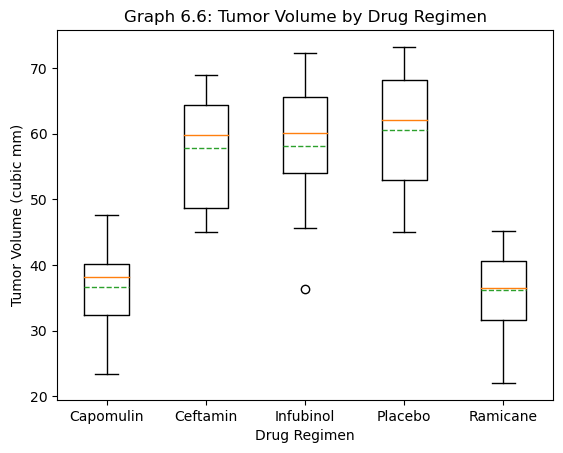

In [35]:
# These lines of code generate a box plot that shows the distrubution 
# of the tumor volume for each treatment group.
fig1, ax \
    = plt \
        .subplots()

ax \
    .set_title \
        (captionsTuple \
            [captionsEnumeration.CAPTION_6_6_TITLE.value])

ax \
    .set_xlabel \
        (captionsTuple \
            [captionsEnumeration.CAPTION_6_6_XLABEL.value])

ax \
    .set_ylabel \
        (captionsTuple \
            [captionsEnumeration.CAPTION_6_6_YLABEL.value])


ax \
    .boxplot \
        (tumorVolumeSeriesList,
         vert \
             = True,
         widths \
             = 0.45,
         meanline \
             = True, 
         showmeans \
             = True)


plt \
    .xticks \
        ([1,2,3,4,5], 
         mostPromisingDrugRegimenNamesList)


plt \
    .show() 

# <br> *Section 7: Create a Line Plot and a Scatter Plot*

## *Line Plot*

In [36]:
# This line of code extracts all rows from the clean medical study DataFrame 
# for the drug regiment, Capomulin.
capomulinStudyDataFrame \
    = cleanStudyCompleteDataFrame \
            .loc \
                [(cleanStudyCompleteDataFrame \
                      [studyCompleteDataFrame.keys() \
                            [StudyCompleteKeysEnumeration.DRUG_REGIMEN.value]] 
                                  == 'Capomulin'),
                :]



# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (capomulinStudyDataFrame)

In [37]:
# This line of code selects a random mouse ID from the clean medical study DataFrame.
randomMouseIDStringVariable \
    = capomulinStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0] \
            [0]


# This subroutine prints the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (randomMouseIDStringVariable)

In [38]:
# This line of code selects a single mouse from the Capolmulin drug trial.
capomulinSingleMouseDataFrame \
    = capomulinStudyDataFrame \
        .loc \
            [(cleanStudyCompleteDataFrame \
                  [studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.MOUSE_ID.value]] 
              == randomMouseIDStringVariable),
             :]


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (capomulinSingleMouseDataFrame)

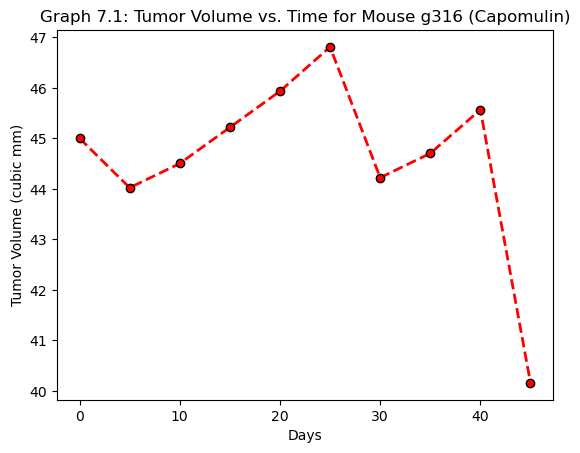

In [39]:
# These lines of code generate a line plot of tumor volume vs. time point 
# for a single mouse treated with Capomulin.
capomulinXValuesSeries \
    = capomulinSingleMouseDataFrame \
        [studyCompleteDataFrame.keys() \
            [StudyCompleteKeysEnumeration.TIMEPOINT.value]]

capomulinYValuesSeries \
    = capomulinSingleMouseDataFrame \
        [studyCompleteDataFrame.keys() \
            [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]]


plt.plot(capomulinXValuesSeries, \
         capomulinYValuesSeries, \
         alpha=1.0, \
         color='red', \
         fillstyle='full', \
         linewidth=2.0, \
         marker='o', \
         markeredgecolor='black',
         linestyle='dashed')


captionStringVariable \
    = f'Graph 7.1: Tumor Volume vs. Time for Mouse {randomMouseIDStringVariable} (Capomulin)'


plt \
    .title \
        (captionStringVariable)

plt \
    .xlabel \
        ('Days')

plt \
    .ylabel \
        ('Tumor Volume (cubic mm)')

plt \
    .show()

## *Scatter Plot*

In [40]:
# This line of code takes the mean of tumor volumes per mouse ID.
capomulinMeanTumorVolumeDataFrame \
    = capomulinStudyDataFrame \
        .groupby \
            (studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.MOUSE_ID.value]) \
            [studyCompleteDataFrame.keys() \
                [StudyCompleteKeysEnumeration.TUMOR_VOLUME.value]] \
        .mean()


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (capomulinMeanTumorVolumeDataFrame)

In [41]:
capomulinMeanWeightDataFrame \
    = capomulinStudyDataFrame \
            .groupby \
                    (studyCompleteDataFrame.keys() \
                        [StudyCompleteKeysEnumeration.MOUSE_ID.value]) \
                            [studyCompleteDataFrame.keys() \
                                [StudyCompleteKeysEnumeration.WEIGHT.value]] \
            .mean()


# This function returns the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugReturnObjectFunction \
    (capomulinMeanWeightDataFrame)

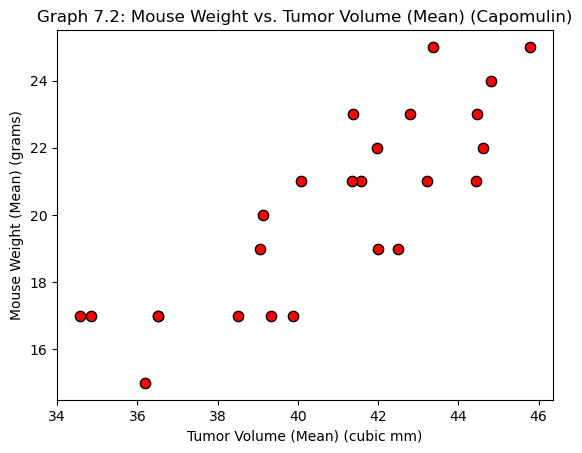

'Graph 7.2: Mouse Weight vs. Tumor Volume (Mean) (Capomulin)'

In [42]:
# These lines of code generate a scatter plot of mouse weight versus average 
# observed tumor volume for the entire Capomulin treatment regimen.
plt \
    .scatter \
        (capomulinMeanTumorVolumeDataFrame, 
         capomulinMeanWeightDataFrame,
         marker \
             = 'o',
         s \
             = 55.0,
         color \
             ='red',
         linewidths \
             = 1.0,
         edgecolors \
             = 'black',
         alpha \
             = 1.0)

plt.title(captionsTuple \
            [captionsEnumeration.CAPTION_7_2_TITLE.value])

plt.xlabel(captionsTuple \
            [captionsEnumeration.CAPTION_7_2_XLABEL.value])

plt.ylabel(captionsTuple \
            [captionsEnumeration.CAPTION_7_2_YLABEL.value])

plt \
    .show()

captionsTuple \
            [captionsEnumeration.CAPTION_7_2_TITLE.value]

# <br> *Section 8: Calculate Correlation and Regression*

## *Correlation Coefficient and Linear Regression Model*

In [43]:
# These lines of code calculate the correlation coefficient and linear 
# regression model between mouse weight and average observed tumor volume 
# for the entire Capomulin treatment regimen.
(slope, 
 intercept, 
 rvalue, 
 pvalue, 
 stderr) \
    = st \
        .linregress \
            (capomulinMeanTumorVolumeDataFrame, 
             capomulinMeanWeightDataFrame)

regressionSeries \
    = (capomulinMeanTumorVolumeDataFrame * slope) + intercept

linearEquationStringVaiable \
    = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# This subroutine prints the object if the global Boolean debug flag, 
# CONSTANT_DEBUG_FLAG, is set to True.
DebugPrintObjectSubRoutine \
    (linearEquationStringVaiable)

## *Plot the Linear Regression Model*

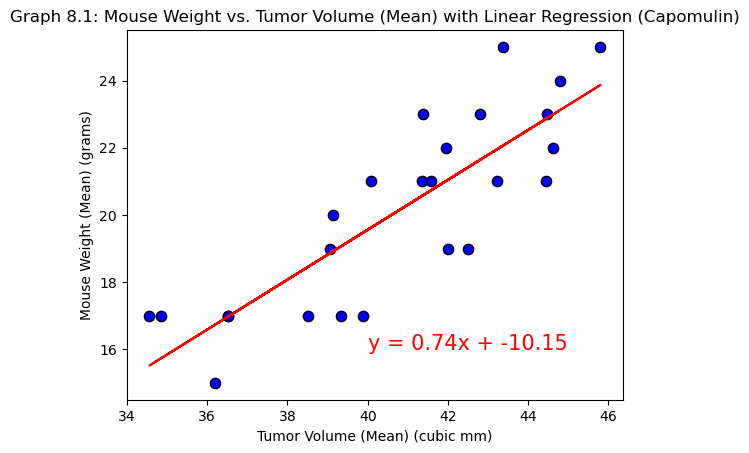

In [44]:
# These lines of code calculate the correlation coefficient and a linear 
# regression model for mouse weight and average observed tumor volume for 
# the entire Capomulin regimen.
plt \
    .scatter \
        (capomulinMeanTumorVolumeDataFrame, 
         capomulinMeanWeightDataFrame,
         marker \
             = 'o',
         s \
             = 55.0,
         color \
             ='blue',
         linewidths \
             = 1.0,
         edgecolors \
             = 'black',
         alpha \
             = 1.0)


plt.title(captionsTuple \
            [captionsEnumeration.CAPTION_8_1_TITLE.value])

plt.xlabel(captionsTuple \
            [captionsEnumeration.CAPTION_8_1_XLABEL.value])

plt.ylabel(captionsTuple \
            [captionsEnumeration.CAPTION_8_1_YLABEL.value])


plt \
    .plot \
        (capomulinMeanTumorVolumeDataFrame,
         regressionSeries,
         'r-')

plt.annotate \
    (linearEquationStringVaiable,
     (40,16),
     fontsize \
         = 15, 
     color \
         = "red")


plt \
    .show()